# Providing data-driven suggestions for HR**

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset contains 15,000 rows and 10 columns for the variables listed below.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# To build model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier, plot_importance
# Metrics and other functions
from sklearn.metrics import recall_score, accuracy_score, precision_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand variables
- Clean dataset (missing data, redundant data, outliers)



### Gathering basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gathering descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Rename columns as needed
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']
# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Checking missing values

In [6]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Checking duplicates

In [7]:
# Check for duplicates
df0.duplicated().sum()

3008

In [8]:
# Inspect some rows containing duplicates as needed
df0.loc[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [9]:
# Drop duplicates and save resulting dataframe in a new variable as needed
customer = df0.drop_duplicates()
# Display first few rows of new dataframe as needed
customer.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# check for duplicates again
customer.duplicated().sum()

0

### Checking outliers

Check for outliers in the data.

In [11]:
# Determine the number of rows containing outliers
Q1 = customer['tenure'].quantile(0.25)
Q3 = customer['tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - (1.5 * IQR)
upper_treshold = Q3 + (1.5 * IQR)

print('Number of Global Outliers:',
      len(customer.loc[customer['tenure'] > upper_treshold]))

Number of Global Outliers: 824


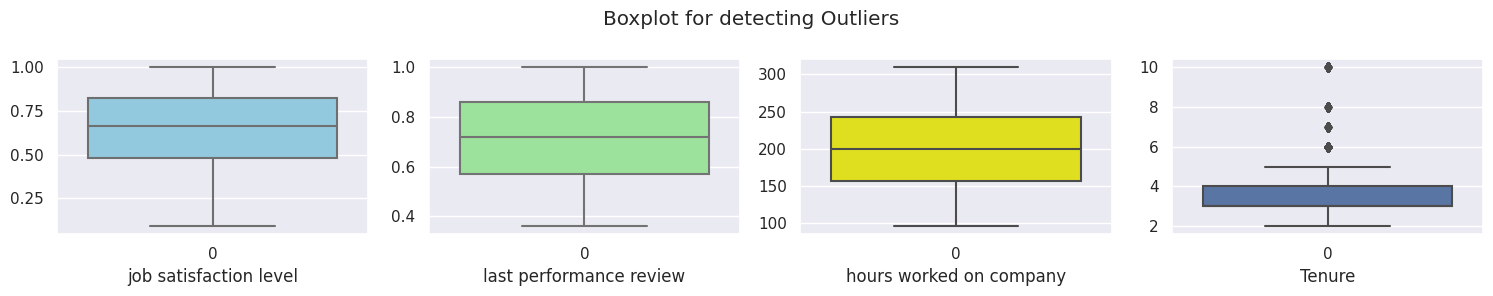

In [12]:
# Create a boxplot to visualize distribution of `time_spend_company` and detect any outliers
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
fig.suptitle('Boxplot for detecting Outliers')

sns.boxplot(customer['satisfaction_level'], color='skyblue', ax=axes[0])
axes[0].set_xlabel('job satisfaction level')

sns.boxplot(customer['last_evaluation'], color='lightgreen', ax=axes[1])
axes[1].set_xlabel('last performance review')

sns.boxplot(customer['average_monthly_hours'], color='yellow', ax=axes[2])
axes[2].set_xlabel('hours worked on company')

sns.boxplot(customer['tenure'], ax=axes[3])
axes[3].set_xlabel('Tenure')

plt.tight_layout()
plt.show();

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Numbers of people who left vs. stayed
print(customer['left'].value_counts())
# Percentages of people who left vs. stayed
print('Percentage of employees who left vs. who did not')
customer['left'].value_counts(normalize=True)

0    10000
1     1991
Name: left, dtype: int64
Percentage of employees who left vs. who did not


0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

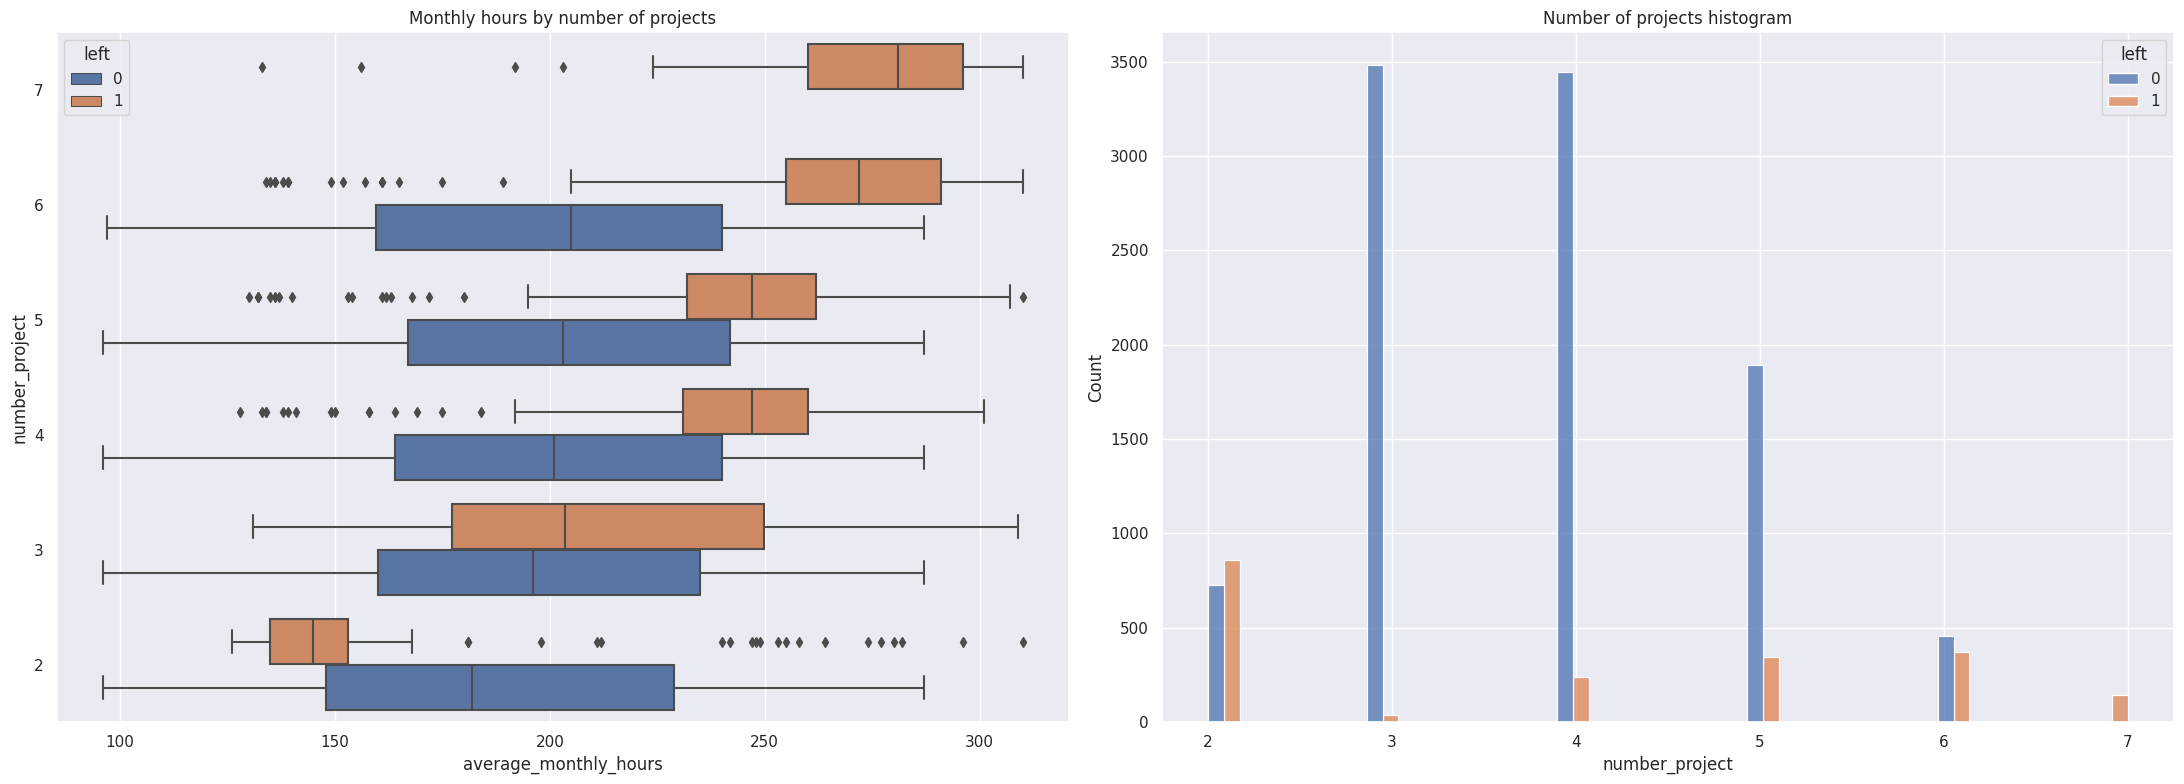

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (22, 8))
sns.set_theme(style='darkgrid')
# Box plot showing 'average_monthly_hours' distribution for 'number_project', compairing people left and stayed.
sns.boxplot(data=customer, x='average_monthly_hours', y='number_project', orient='h', hue='left', ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title('Monthly hours by number of projects')

# Histogram  for 'number_project', compairing people left and stayed.
sns.histplot(data=customer, x='number_project', hue='left', multiple='dodge', ax=axes[1])
axes[1].set_title('Number of projects histogram')

plt.tight_layout()
plt.show();

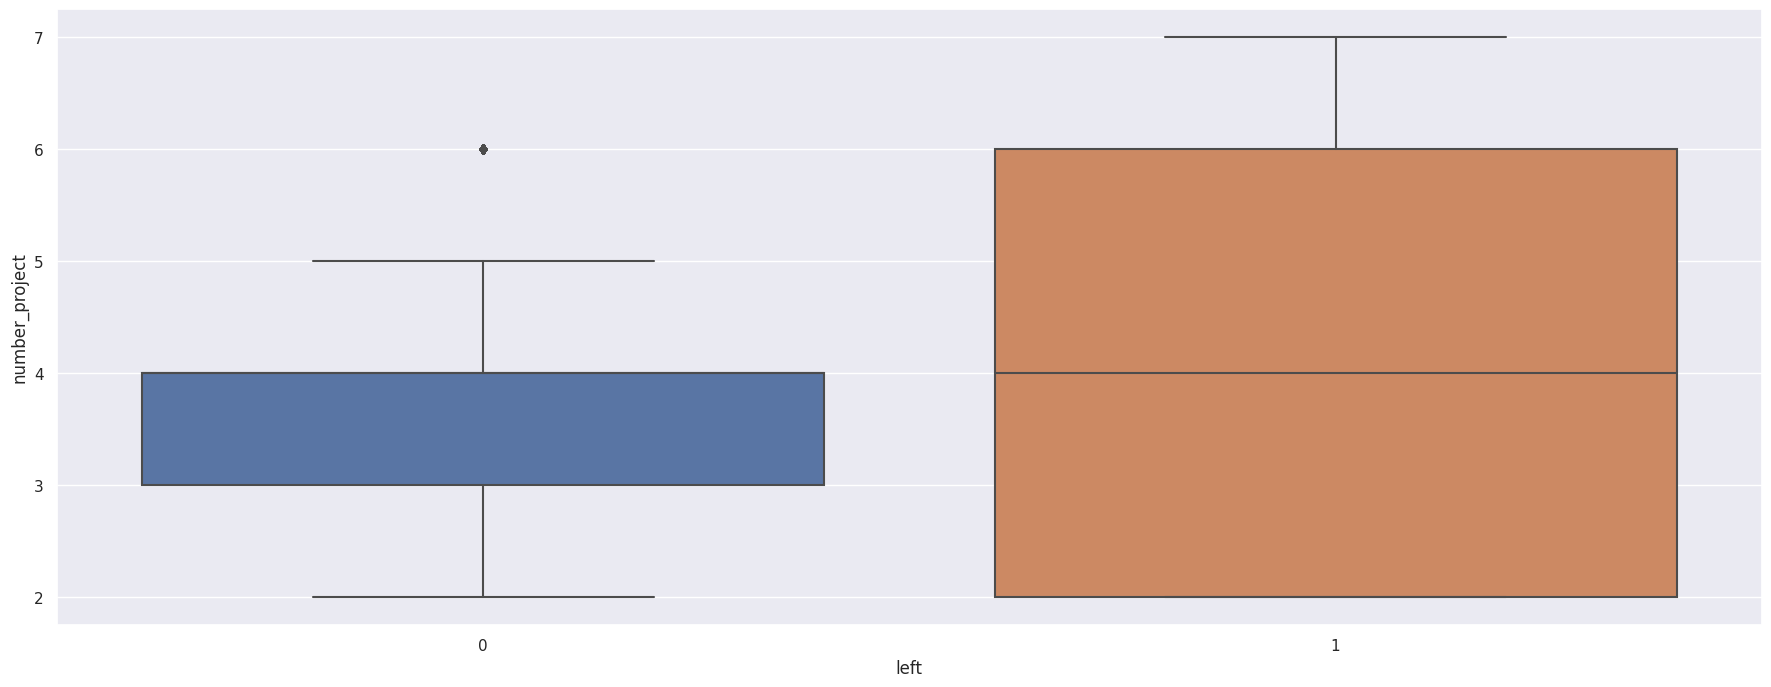

In [15]:
# boxplot for `project_number`
plt.figure(figsize=(22, 8))
sns.boxplot(x='left', y='number_project', data=customer)
plt.show();

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/week—much more than any other group.

The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

In [16]:
# value counts of stayed/left for employees with 7 projects
customer.loc[customer['number_project'] == 7]['left'].value_counts(normalize=True)

1    1.0
Name: left, dtype: float64

This confirms that all employees with 7 projects did leave.

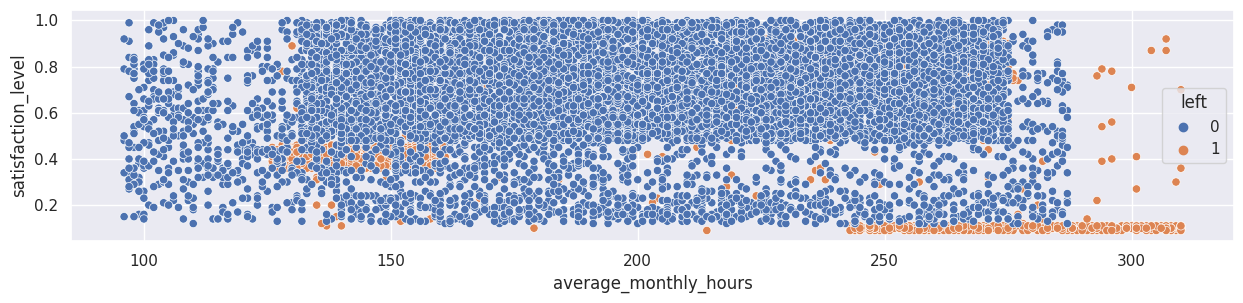

In [17]:
# 'satisfaction_level' accourding to 'average_monthly_hours'
plt.figure(figsize=(15, 3))
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level',
                data=customer, hue='left')
plt.show();

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

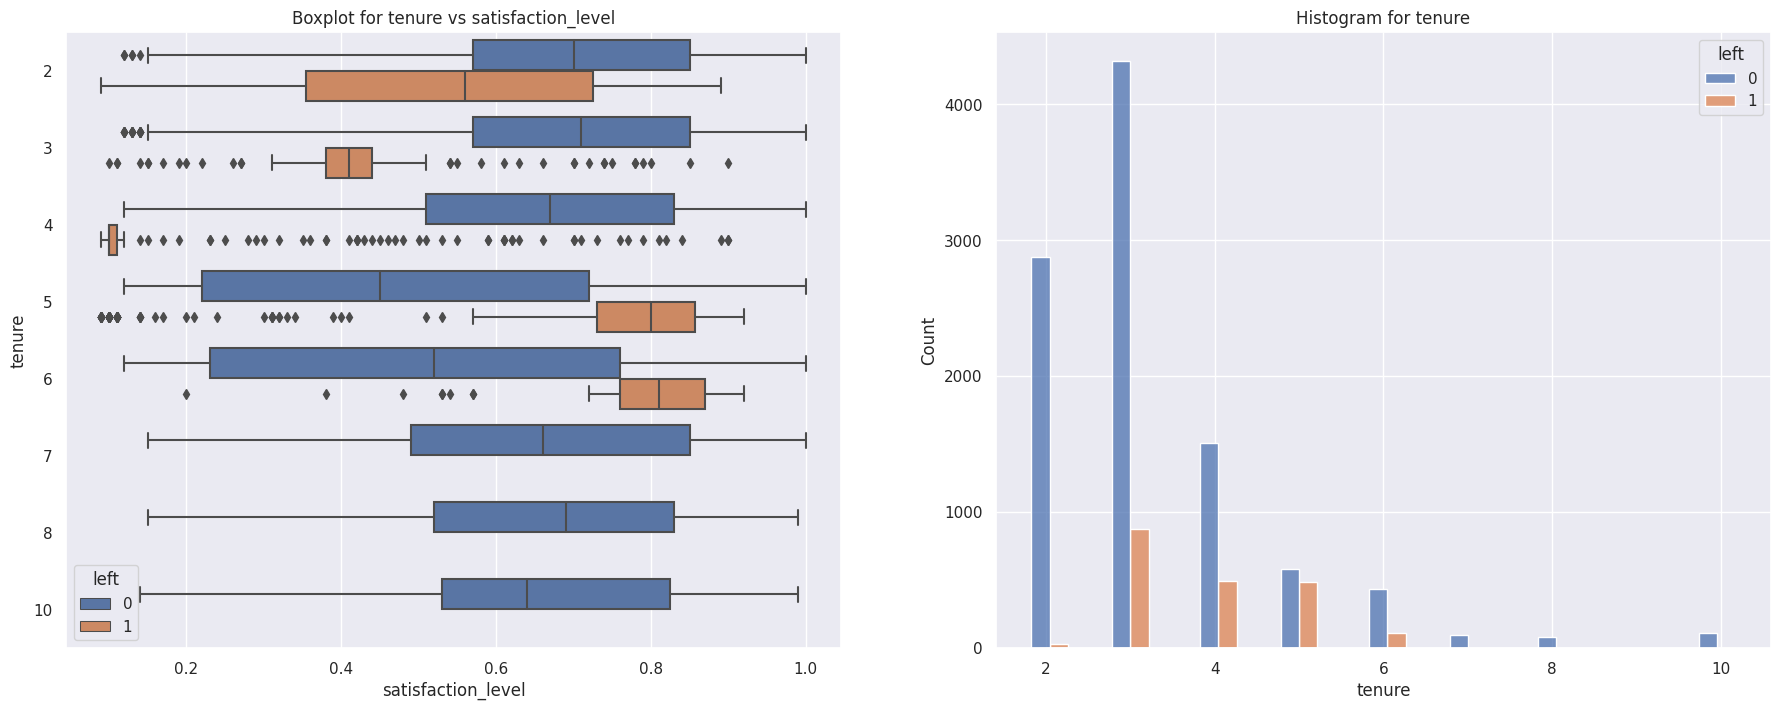

In [18]:
# Satisfaction level for tenure
fig, axes = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(x=customer['satisfaction_level'], y=customer['tenure'], hue=customer['left'], orient='h', ax=axes[0])
axes[0].set_title('Boxplot for tenure vs satisfaction_level')

# Histogram showing distribution of tenure and compairing employees who left and stayed
tenure_stay = customer[customer['left']==0]['tenure']
tenure_left = customer[customer['left']==1]['tenure']
sns.histplot(data=customer, x='tenure', hue='left', multiple='dodge', shrink=5, ax=axes[1])
axes[1].set_title('Histogram for tenure')

plt.show()

Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [19]:
# use groupby
customer.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are less than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

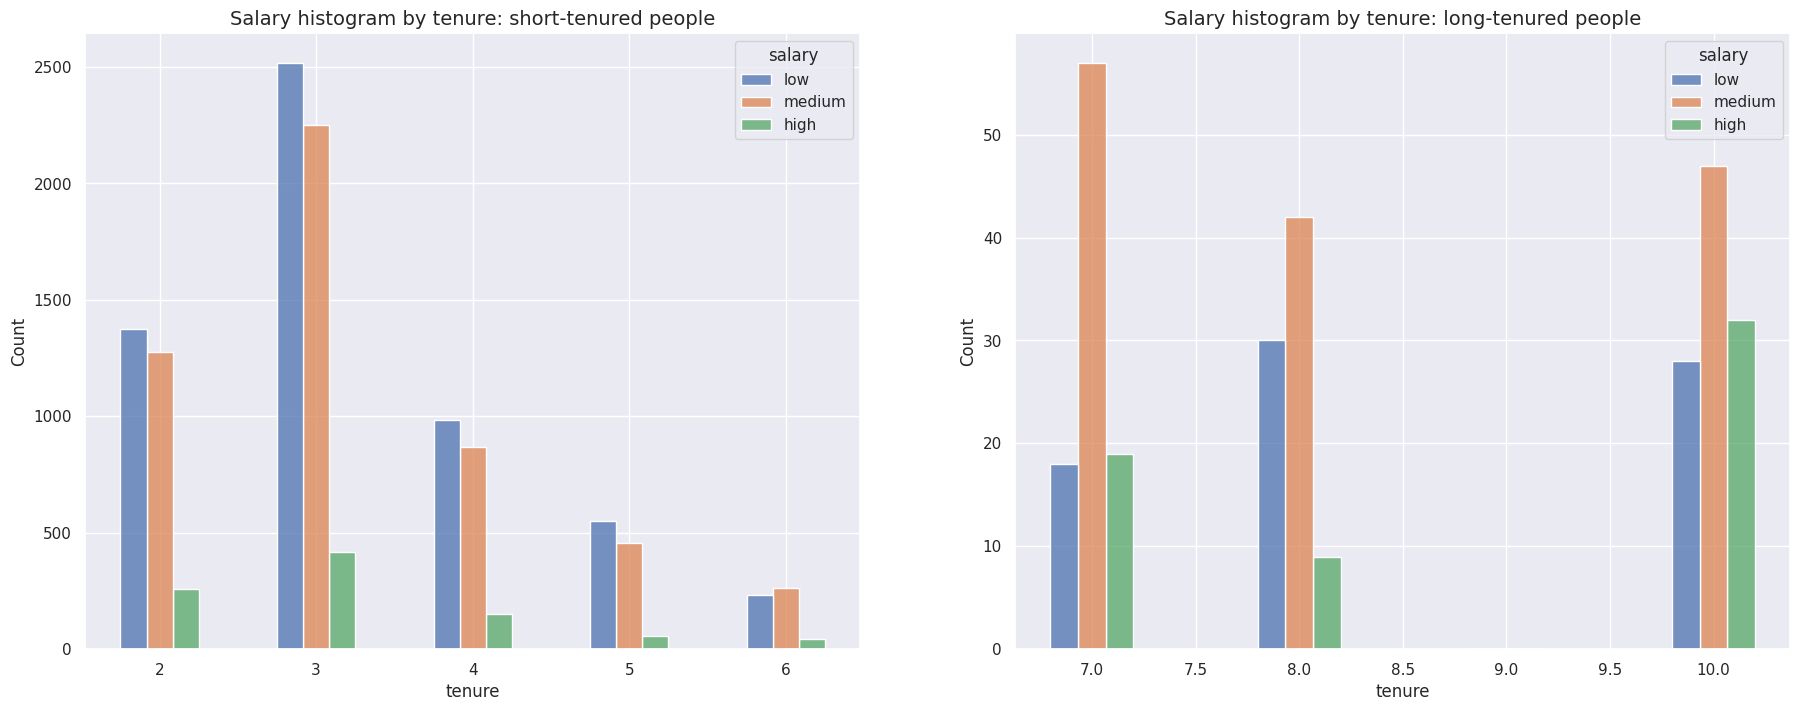

In [20]:
#Histogram for Salary levels for different time_spend_company.

fig, axes = plt.subplots(1, 2, figsize=(22,8))
short_tenure = customer[customer['tenure'] < 7]
long_tenure = customer[customer['tenure'] > 6]

sns.histplot(data=short_tenure, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.5, discrete=1, ax=axes[0])
axes[0].set_title('Salary histogram by tenure: short-tenured people', fontsize=14)

sns.histplot(data=long_tenure, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.4, discrete=1, ax=axes[1])
axes[1].set_title('Salary histogram by tenure: long-tenured people', fontsize=14)

plt.show();

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

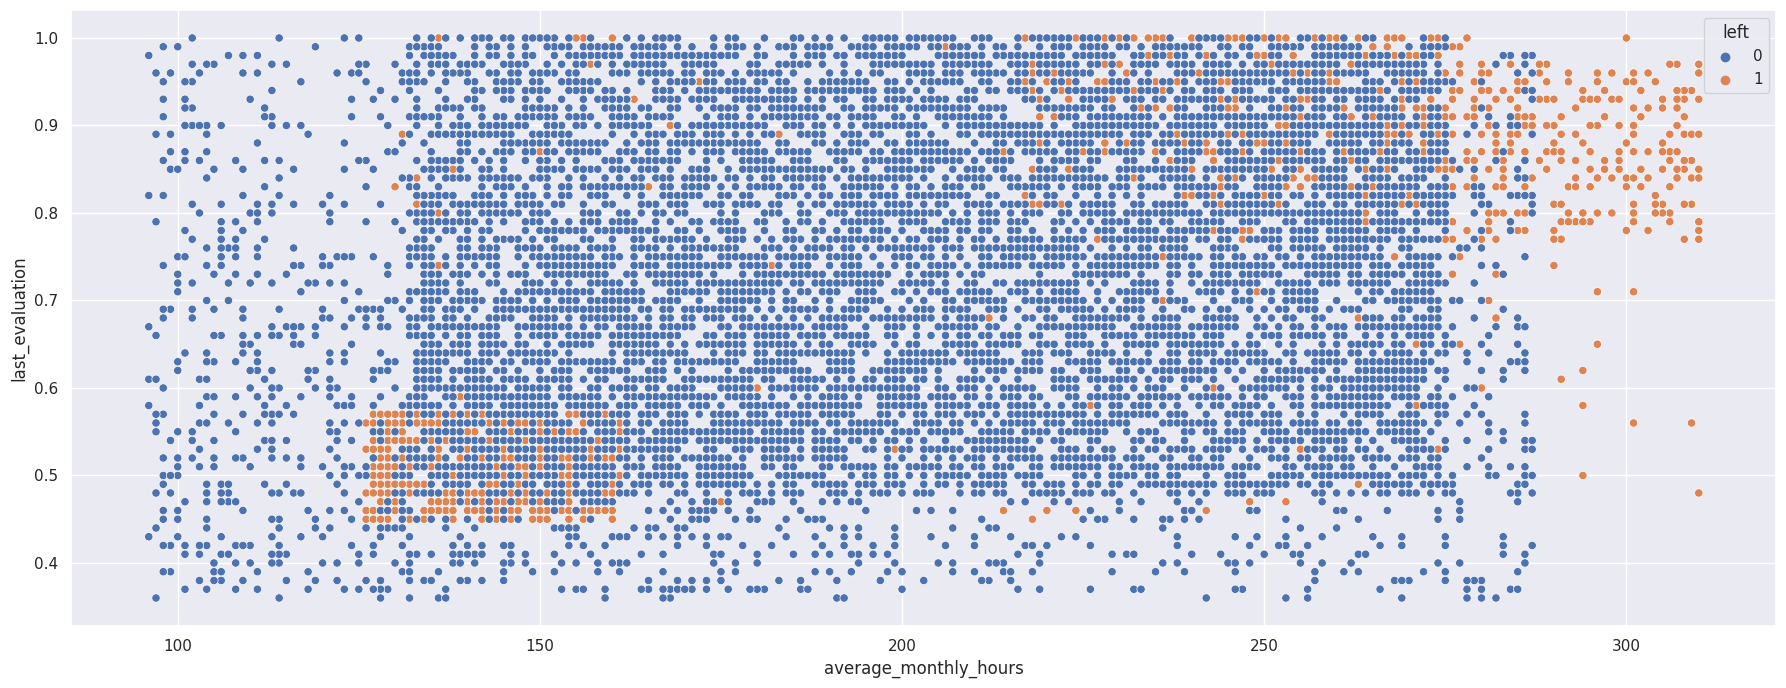

In [21]:
#Scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(22, 8))
sns.scatterplot(x='average_monthly_hours',
                y='last_evaluation', data=customer, hue='left')
plt.show();

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.

There seems to be a correlation between hours worked and evaluation score.

There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.

Most of the employees in this company work well over 167 hours per month.

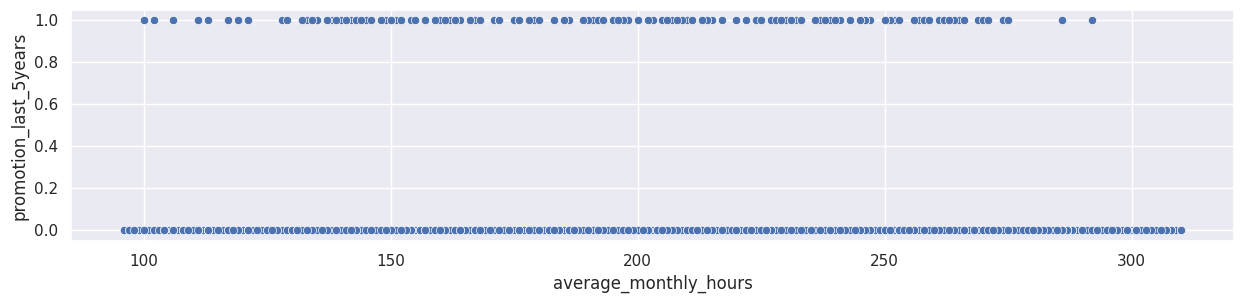

In [22]:
#Scatterplot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(15, 3))
sns.scatterplot(x='average_monthly_hours',
                y='promotion_last_5years', data=customer)
plt.show();

Very few employees who were promoted in the last five years left

Very few employees who worked the most hours were promoted

All of the employees who left were working the longest hours

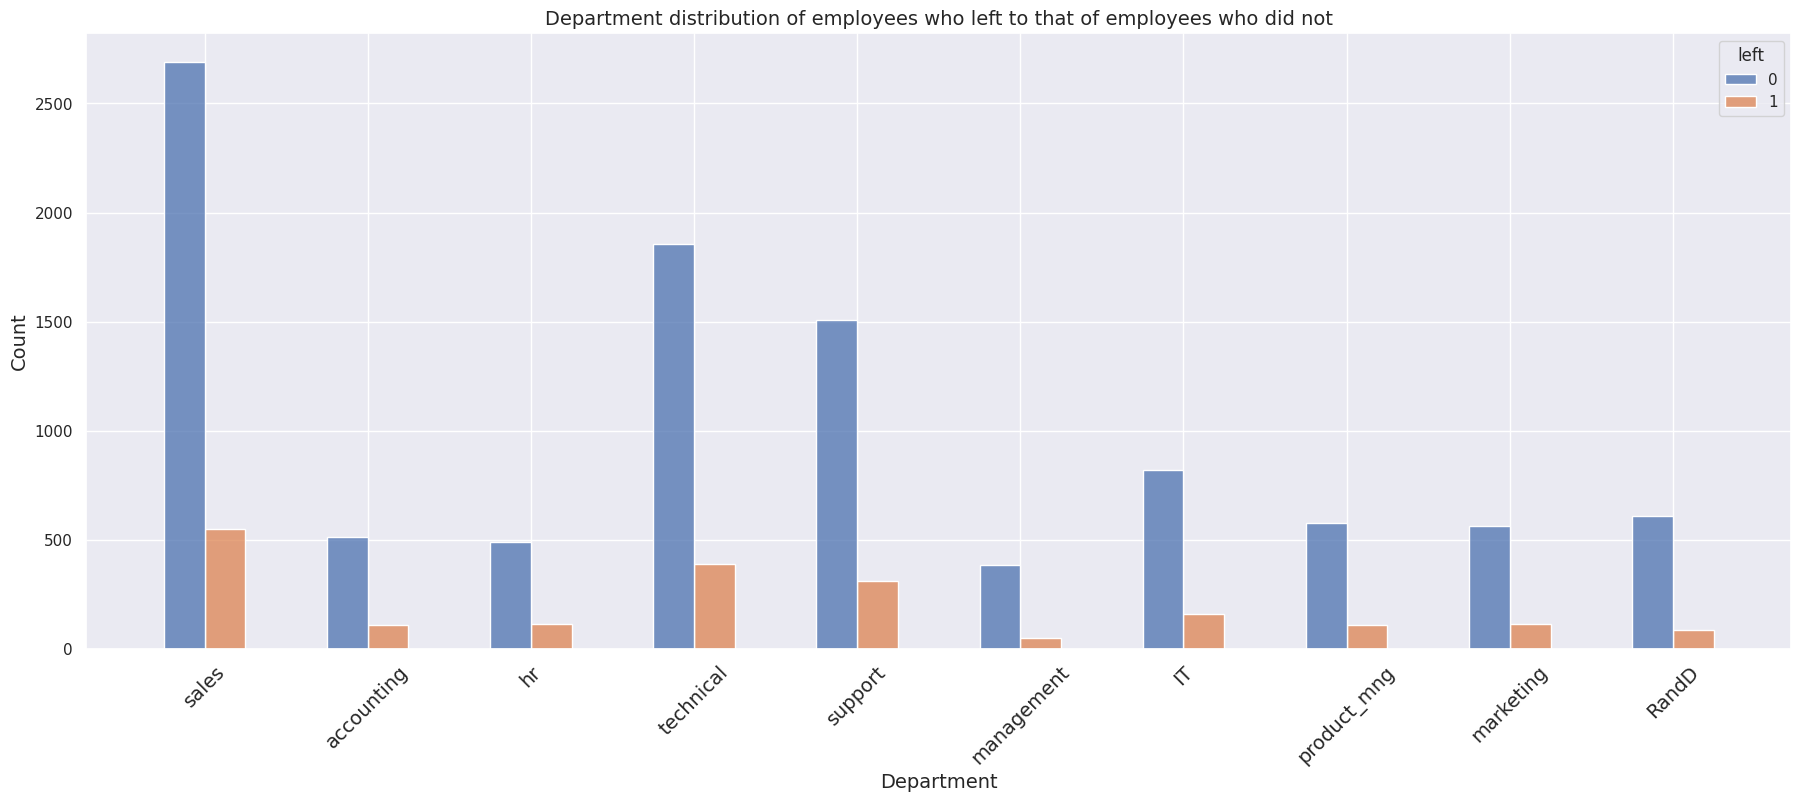

In [23]:
plt.figure(figsize=(22,8))
sns.histplot(data=customer, x='department', hue='left', multiple='dodge', discrete=1, shrink=.5, hue_order=[0, 1])
plt.title('Department distribution of employees who left to that of employees who did not', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.show();

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

### **Impute Outliers**

In [24]:
# write a function for detecting Outliers
def impute_outliers(column, iqr_factor):
    for value in column:
        Q1 = customer[value].quantile(0.25)
        Q3 = customer[value].quantile(0.75)
        IQR = Q3 - Q1
        lower_threshold = Q1 - (iqr_factor * IQR)
        upper_treshold = Q3 + (iqr_factor * IQR)
        customer.loc[customer[value] < lower_threshold, value] = lower_threshold
        customer.loc[customer[value] > upper_treshold, value] = upper_treshold

impute_outliers(['satisfaction_level'], 1.5)
impute_outliers(['last_evaluation'], 1.5)
impute_outliers(['average_monthly_hours'], 1.5)
impute_outliers(['tenure'], 1.5)

**Feature Extraction**

In [25]:
# Make a Copy of data
data = customer.copy()

In [26]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

The `department` column, represents many objects, which are different from another; so it may be useful to use this feature

In [27]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [28]:
data['department'] = LabelEncoder().fit_transform(data[['department']])
data['department'] = data['department'].astype(int)
data['salary'] = LabelEncoder().fit_transform(data[['salary']])
data['salary'] = data['salary'].astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


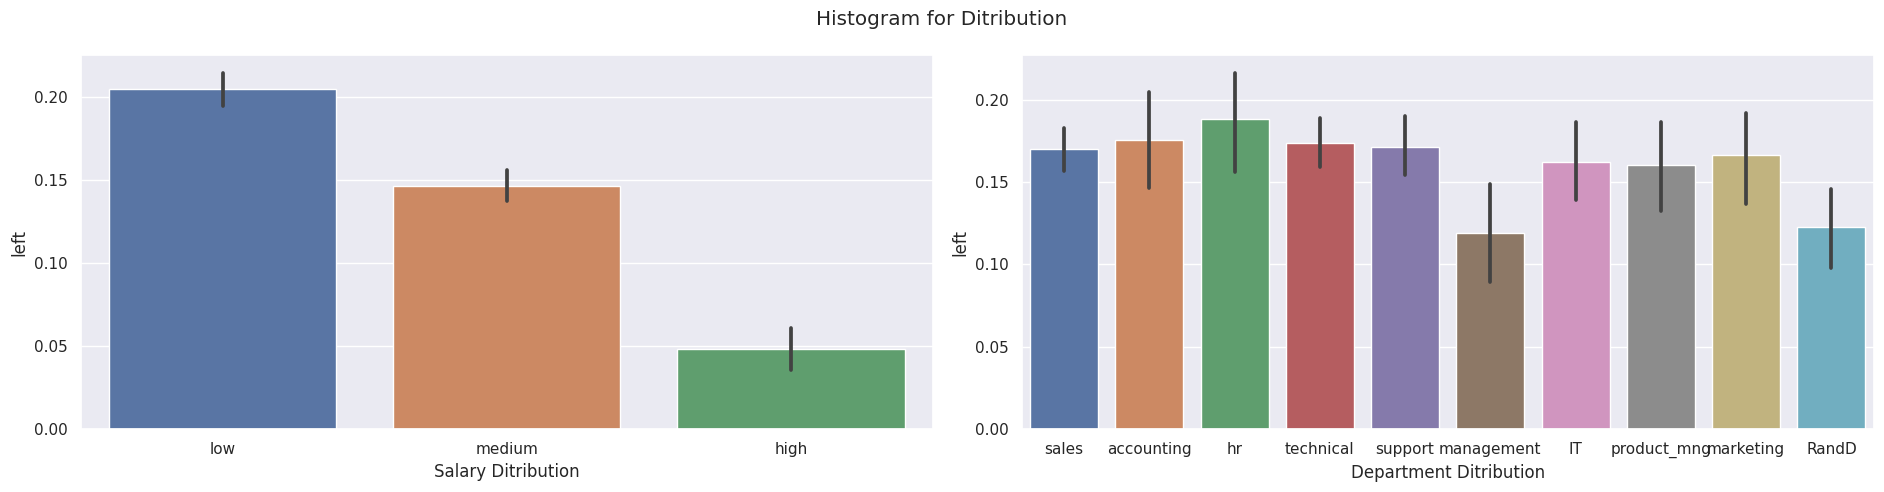

In [29]:
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(19, 5))
fig.suptitle('Histogram for Ditribution')

sns.barplot(x=customer['salary'], y=customer['left'], ax=axes[0])
axes[0].set_xlabel('Salary Ditribution')

sns.barplot(x=customer['department'], y=customer['left'], ax=axes[1])
axes[1].set_xlabel('Department Ditribution')

plt.tight_layout()
plt.show();

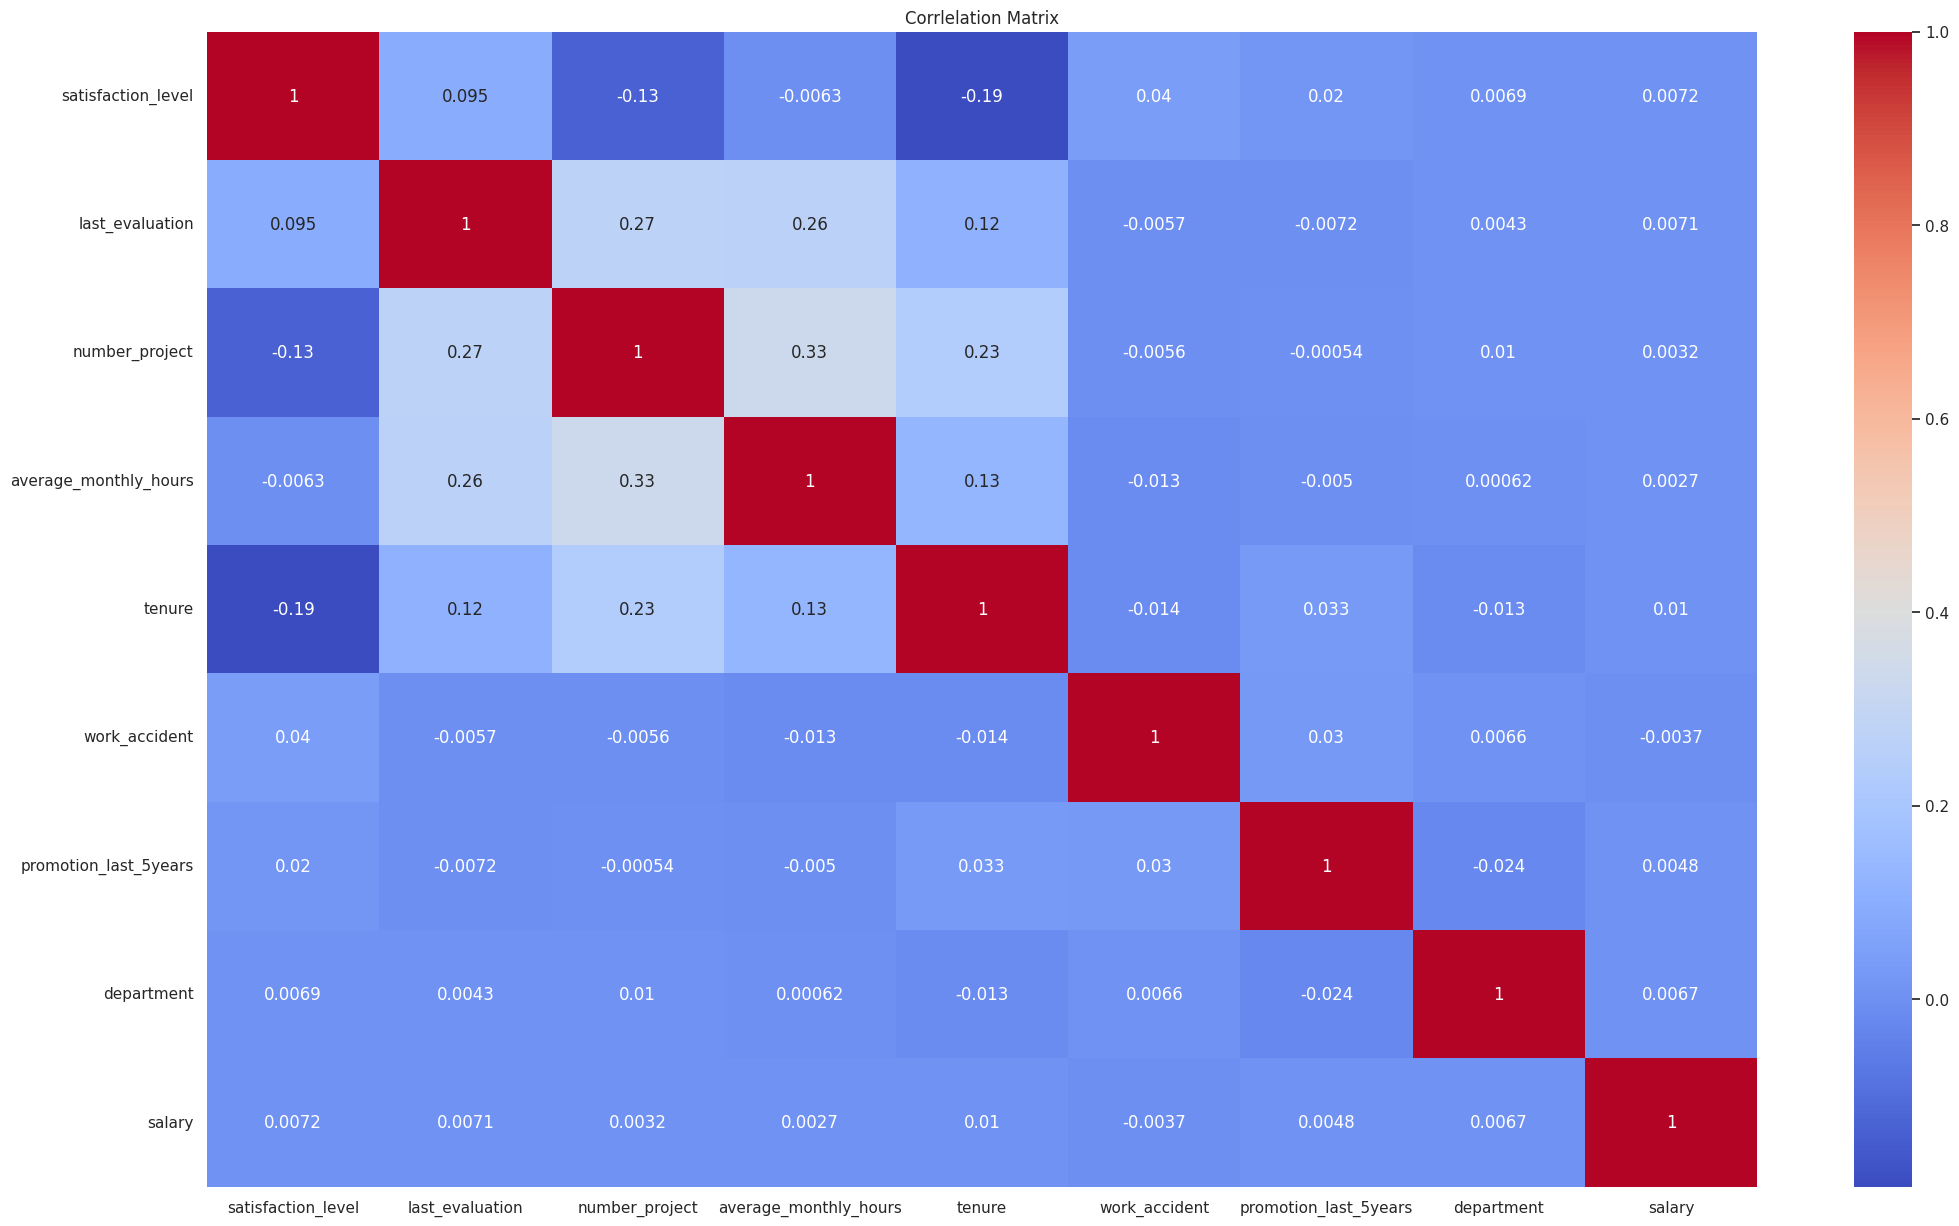

In [30]:
# Checking correlations between variables in the data.
plt.figure(figsize=(25, 15))
plt.title('Corrlelation Matrix')

sns.heatmap(data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'department', 'salary']].corr(numeric_only=True),
           cmap='coolwarm',
           annot=True)
plt.show();

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Recalling model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

### Modeling

# Logistic Regression

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`.

`department` is a categorical variable, which means you can dummy it for modeling.

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [31]:
# Isolating variable which we want to predict
y = data['left']
# Selecting the features we want to use in your model
X = data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'department', 'salary']]

In [32]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.25,
                                                   random_state=0)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8993, 9), (2998, 9), (8993,), (2998,))

In [34]:
X_train.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary
count,8993.000000,8993.000000,8993.000000,8993.000000,8993.000000,8993.000000,8993.000000,8993.000000,8993.000000
mean,0.629364,0.716832,3.797287,200.838652,3.269098,0.154898,0.016791,5.869565,1.350050
std,0.240464,0.168183,1.160279,48.807463,1.058392,0.361828,0.128494,2.908831,0.627446
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,158.000000,3.000000,0.000000,0.000000,4.000000,1.000000
50%,0.660000,0.720000,4.000000,201.000000,3.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,5.500000,1.000000,1.000000,9.000000,2.000000


In [35]:
# normalize the data
scaler = StandardScaler().fit(X_train)
# scale X_train
scaled_x_train = scaler.transform(X_train)
# scale X_test
scaled_x_test = scaler.transform(X_test)

In [36]:
# Construct a logistic regression model
classifier = LogisticRegression(max_iter=1000).fit(scaled_x_train, y_train)

In [37]:
pd.DataFrame({'Features':X.columns,
              'Coeffiecients':classifier.coef_[0]})

,Features,Coeffiecients
0,satisfaction_level,-0.929586
1,last_evaluation,0.065902
2,number_project,-0.383778
3,average_monthly_hours,0.180548
4,tenure,0.611291
5,work_accident,-0.562963
6,promotion_last_5years,-0.208993
7,department,0.071424
8,salary,0.021596


In [38]:
# fitting classifier to the training dataset
# In logistics regression, each feature should have linear relationship with
# the logit of y; this is known as (Binomial logistic regression linearity assumption)
training_probabilities = classifier.predict_proba(X_train)
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]
# use head fuction
logit_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
<ipython-input-38-fd1c99b97456>:9: RuntimeWarning: divide by zero encountered in double_scalars
  logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary,logit
9187,0.90,0.55,4,211,3.0,0,0,2,2,36.043653
7204,0.59,0.97,3,258,2.0,0,0,2,1,inf
10499,0.17,0.73,4,188,5.0,0,0,9,1,33.846429
6424,0.50,0.89,3,187,4.0,1,0,7,2,32.488305
3197,0.94,0.77,5,210,3.0,0,0,6,0,35.350506


In [39]:
logit_data['logit'].describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    8993.000000
mean             inf
std              NaN
min        13.694901
25%        26.803948
50%        34.251894
75%              NaN
max              inf
Name: logit, dtype: float64

In [40]:
logit_data.loc[logit_data['logit'] == np.inf] = 0

In [41]:
logit_data['logit'].describe()

count    8993.000000
mean       16.074574
std        14.318293
min         0.000000
25%         0.000000
50%        22.516825
75%        28.659664
max        36.043653
Name: logit, dtype: float64

In [42]:
corr_matrix = logit_data.corr()
corr_matrix['logit'].sort_values(ascending=False)

logit                    1.000000
average_monthly_hours    0.999126
last_evaluation          0.921360
number_project           0.887330
satisfaction_level       0.871490
tenure                   0.870302
salary                   0.784819
department               0.764621
work_accident            0.269715
promotion_last_5years    0.080373
Name: logit, dtype: float64

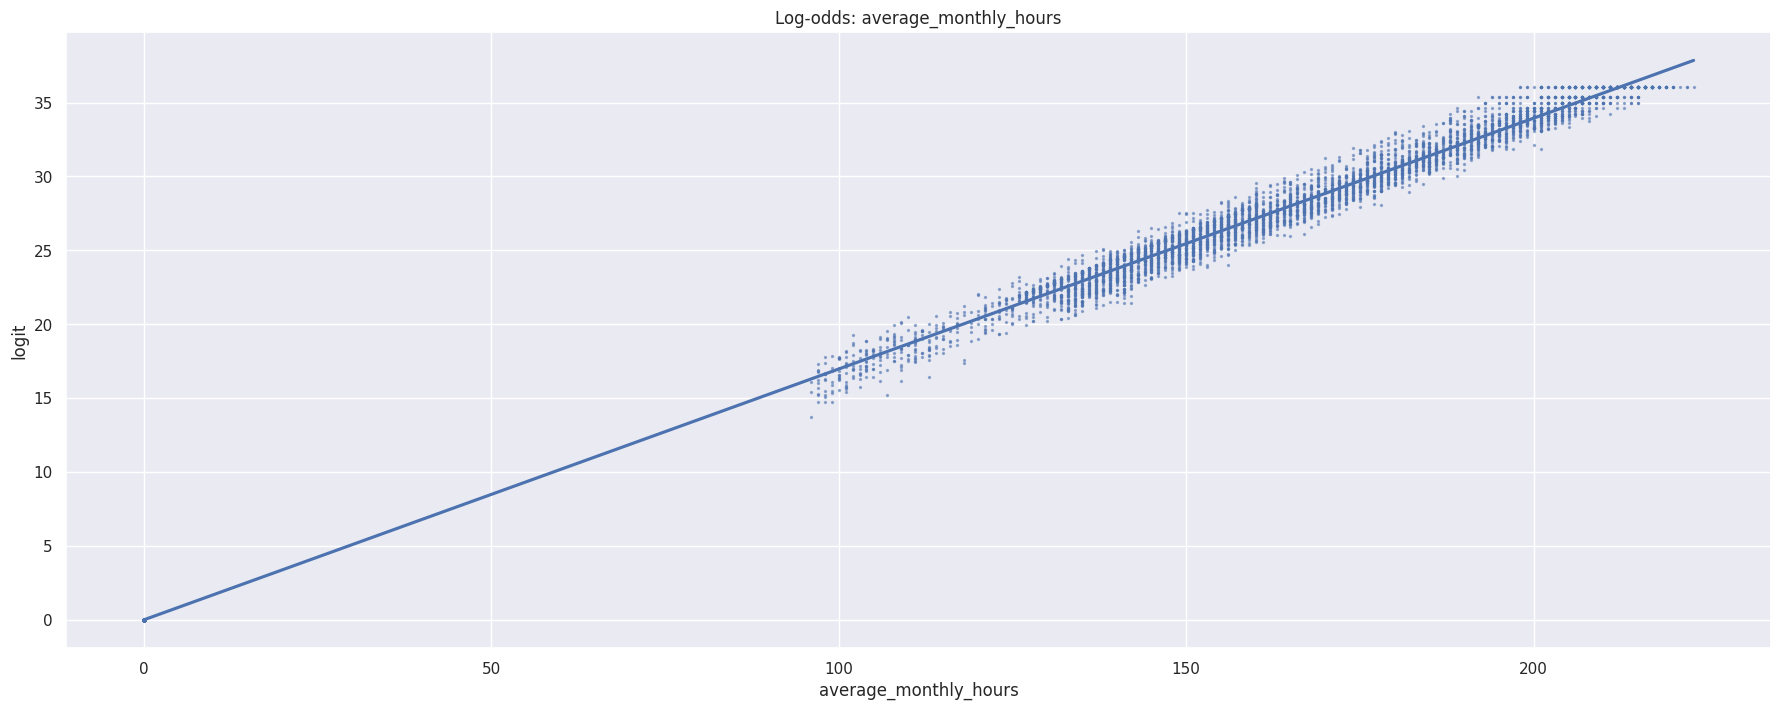

In [43]:
# Plot regplot of `average_monthly_hours` log-odds
sns.set_theme(style='darkgrid')
plt.figure(figsize=(22, 8))
sns.regplot(x='average_monthly_hours', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: average_monthly_hours');

In [44]:
# Predictions of the test set
y_pred = classifier.predict(scaled_x_test)

In [45]:
y_pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

In [46]:
y_test[:10]

4981     0
30       1
10413    0
8231     0
2804     0
791      1
5560     0
2512     0
3549     0
6614     0
Name: left, dtype: int64

<Figure size 2200x800 with 0 Axes>

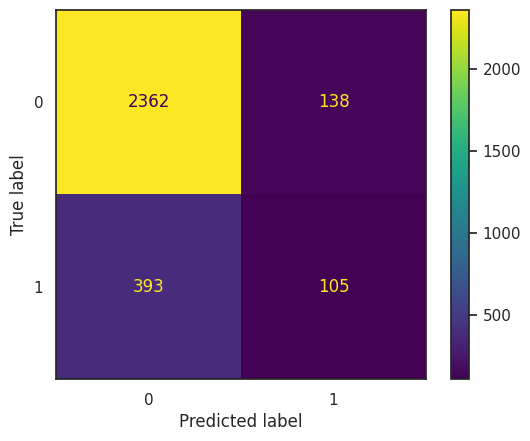

In [47]:
# Creating confusion matrix to visualize the result of logistic regression model
plt.figure(figsize=(22, 8))
sns.set_theme(style='white')
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
disp.plot()
plt.show();

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [48]:
# evaluation's metrics for logistic regression model
print("Model's Accuracy:", accuracy_score(y_test, y_pred))
print("Model's Recall:", recall_score(y_test, y_pred))
print("Model's Precision:", precision_score(y_test, y_pred))
print("Model's F1 score:", f1_score(y_test, y_pred))
print("Model's ROC-AUC:", roc_auc_score(y_test, y_pred))

Model's Accuracy: 0.8228819212808539
Model's Recall: 0.21084337349397592
Model's Precision: 0.43209876543209874
Model's F1 score: 0.2834008097165992
Model's ROC-AUC: 0.577821686746988


In [49]:
target_names = ['left', 'did not leave']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

         left       0.86      0.94      0.90      2500
did not leave       0.43      0.21      0.28       498

     accuracy                           0.82      2998
    macro avg       0.64      0.58      0.59      2998
 weighted avg       0.79      0.82      0.80      2998



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### Naive Bayes

In [50]:
# Instantiate the naive bayes model
naive_bayes = GaussianNB().fit(X_train, y_train)
# predict on the model
naive_bayes_pred = naive_bayes.predict(X_test)
# display your predictions
naive_bayes_pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [51]:
# display actual values
y_test[:10]

4981     0
30       1
10413    0
8231     0
2804     0
791      1
5560     0
2512     0
3549     0
6614     0
Name: left, dtype: int64

In [52]:
# evaluation's metrics for Naive Bayes model
print("Model's Accuracy:", accuracy_score(y_test, naive_bayes_pred))
print("Model's Recall:", recall_score(y_test, naive_bayes_pred))
print("Model's Precision:", precision_score(y_test, naive_bayes_pred))
print("Model's F1 score:", f1_score(y_test, naive_bayes_pred))
print("Model's ROC-AUC:", roc_auc_score(y_test, naive_bayes_pred))

Model's Accuracy: 0.8352234823215477
Model's Recall: 0.6927710843373494
Model's Precision: 0.5029154518950437
Model's F1 score: 0.5827702702702703
Model's ROC-AUC: 0.7781855421686747


In [53]:
# Classification report on Naive Bayes
target_names = ['left', 'did not leave']
print(classification_report(y_test, naive_bayes_pred, target_names=target_names))

               precision    recall  f1-score   support

         left       0.93      0.86      0.90      2500
did not leave       0.50      0.69      0.58       498

     accuracy                           0.84      2998
    macro avg       0.72      0.78      0.74      2998
 weighted avg       0.86      0.84      0.85      2998



we can see, that Naive Bayes performs clearly better!

In [54]:
print('Coefficient of determination for trainig set:',
      naive_bayes.score(X_train, y_train))

print('Coefficient of determination for testing set:',
      naive_bayes.score(X_test, y_test))

Coefficient of determination for trainig set: 0.8444345602134994
Coefficient of determination for testing set: 0.8352234823215477


Thankfuly, we can also observe that the model does not Overfit!

# Tree-based Model

In [55]:
X = data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident',
       'promotion_last_5years', 'department', 'salary']]

y = data['left']

In [56]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    test_size=0.25,
                                                    stratify=y)

### Decision tree

In [57]:
# Instantiating model
decision_tree = DecisionTreeClassifier(random_state=0)

In [58]:
# Fit the model and use the time magic
%%time
decision_tree.fit(X_train, y_train)

CPU times: user 42 ms, sys: 25 µs, total: 42 ms
Wall time: 42.7 ms


DecisionTreeClassifier(random_state=0)

In [59]:
decision_tree_pred = decision_tree.predict(X_test)

In [60]:
decision_tree_pred[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [61]:
y_test[:10]

4981     0
30       1
10413    0
8231     0
2804     0
791      1
5560     0
2512     0
3549     0
6614     0
Name: left, dtype: int64

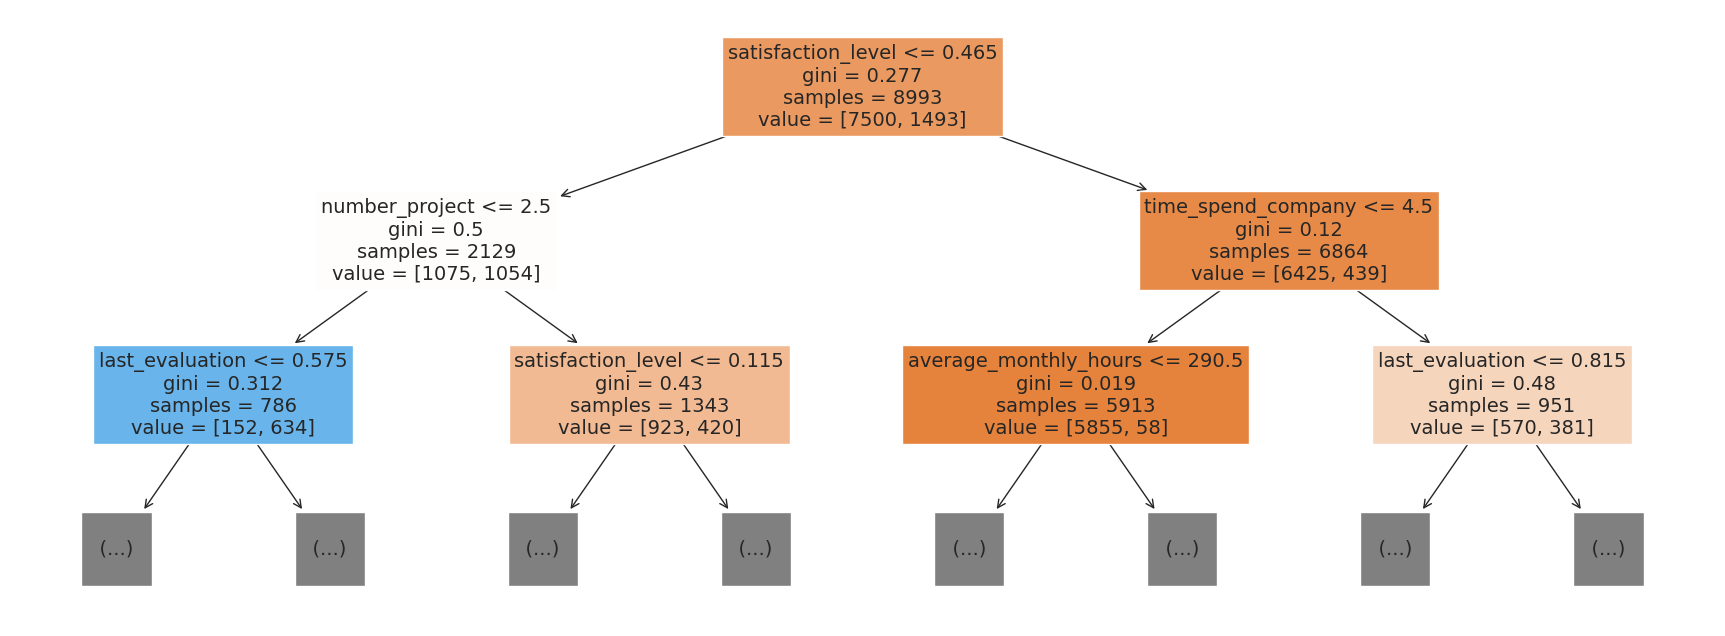

In [62]:
# plot decision tree
plt.figure(figsize=(22, 8))
plot_tree(decision_tree, fontsize=14, filled=True,
          max_depth=2, feature_names=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary'])
plt.show();

In [63]:
# Evaluation metrics for  Decision Tree model
print('Accuracy:', accuracy_score(y_test, decision_tree_pred))
print('Recall:', recall_score(y_test, decision_tree_pred))
print('Precision:', precision_score(y_test, decision_tree_pred))
print('F1 score:', f1_score(y_test, decision_tree_pred))
print('ROC-AUC:', roc_auc_score(y_test, decision_tree_pred))

Accuracy: 0.9646430953969313
Recall: 0.9096385542168675
Precision: 0.8813229571984436
F1 score: 0.8952569169960474
ROC-AUC: 0.9426192771084337


In [64]:
# Classification report for Decision Tree model
print(classification_report(y_test, decision_tree_pred, target_names=target_names))

               precision    recall  f1-score   support

         left       0.98      0.98      0.98      2500
did not leave       0.88      0.91      0.90       498

     accuracy                           0.96      2998
    macro avg       0.93      0.94      0.94      2998
 weighted avg       0.97      0.96      0.96      2998



In [65]:
print('Coefficient of determination for trainig set:',
      decision_tree.score(X_train, y_train))

print('Coefficient of determination for testing set:',
      decision_tree.score(X_test, y_test))

Coefficient of determination for trainig set: 1.0
Coefficient of determination for testing set: 0.9646430953969313


Decision trees can be vulnerable to overfitting (as above shown, the R^2 for training set is 1, and **higher Coefficient leads the model to the problem of Overfitting**), but luckily, random forests avoid overfitting by incorporating multiple trees to make predictions.

### Random forest - Round 1

In [66]:
# Instantiating model
random_forest = RandomForestClassifier(random_state=0)
# Creating dictionary of hyperparameter to search over
hyperparameter = {'max_depth': [2, 3, None],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [100, 200, 300],
             }
# Scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}
# Instantiating GridSearch
random_forest_classifier = GridSearchCV(random_forest,
                                        param_grid=hyperparameter,
                                        scoring=scoring,
                                        cv=5,
                                        refit='precision')

In [67]:
# Fit the model
%%time
random_forest_classifier.fit(X_train, y_train)

CPU times: user 50.4 s, sys: 182 ms, total: 50.6 s
Wall time: 1min


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, None], 'min_samples_leaf': [2],
                         'min_samples_split': [2],
                         'n_estimators': [100, 200, 300]},
             refit='precision',
             scoring={'precision', 'accuracy', 'recall', 'f1'})

In [68]:
random_forest_pred = random_forest_classifier.best_estimator_.predict(X_test)

In [69]:
random_forest_pred[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [70]:
y_test[:10]

4981     0
30       1
10413    0
8231     0
2804     0
791      1
5560     0
2512     0
3549     0
6614     0
Name: left, dtype: int64

In [71]:
print('Best Avg. precision score:', random_forest_classifier.best_score_)

Best Avg. precision score: 0.9876027177331526


In [72]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          })

    return table

In [73]:
# Best parameters
random_forest_classifier.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [74]:
# All CV scores
table_results = make_results('Random Forest', random_forest_classifier, 'precision')
table_results

,model,precision,recall,F1,accuracy
0,Random Forest,0.987603,0.908907,0.946589,0.982987


In [75]:
# Evaluation metrics for random forest model
print('Accuracy:', accuracy_score(y_test, decision_tree_pred))
print('Recall:', recall_score(y_test, decision_tree_pred))
print('Precision:', precision_score(y_test, decision_tree_pred))
print('F1 score:', f1_score(y_test, decision_tree_pred))
print('ROC-AUC:', roc_auc_score(y_test, decision_tree_pred))

Accuracy: 0.9646430953969313
Recall: 0.9096385542168675
Precision: 0.8813229571984436
F1 score: 0.8952569169960474
ROC-AUC: 0.9426192771084337


<Figure size 2200x800 with 0 Axes>

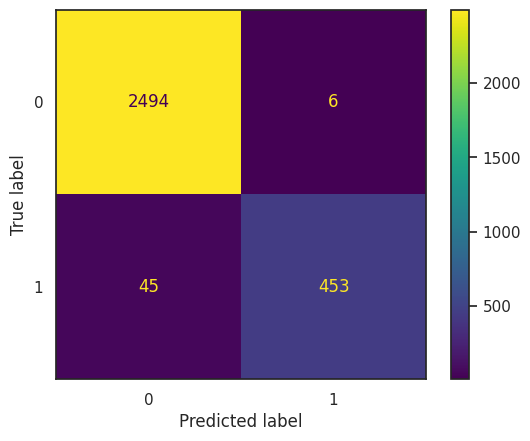

In [76]:
# Creating confusion matrix to visualize the result of random forest model
plt.figure(figsize=(22, 8))
sns.set_theme(style='white')
cm = confusion_matrix(y_test, random_forest_pred, labels=random_forest_classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=random_forest_classifier.classes_)
disp.plot()
plt.show();

In [77]:
# classification report for random forest model
target_names = ['left', 'did not leave']
print(classification_report(y_test, random_forest_pred, target_names=target_names))

               precision    recall  f1-score   support

         left       0.98      1.00      0.99      2500
did not leave       0.99      0.91      0.95       498

     accuracy                           0.98      2998
    macro avg       0.98      0.95      0.97      2998
 weighted avg       0.98      0.98      0.98      2998



The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.01 upper, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

In [78]:
# Function that gets all the scores from a model's predictions.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [79]:
# Predictions on test data
result1 = get_scores('Random Forest Predictions', random_forest_classifier, X_test, y_test)
result1

,model,precision,recall,f1,accuracy,AUC
0,Random Forest Predictions,0.986928,0.909639,0.946708,0.982989,0.953619


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

In [80]:
print('Coefficient of determination for trainig set:',
      random_forest_classifier.score(X_train, y_train))

print('Coefficient of determination for testing set:',
      random_forest_classifier.score(X_test, y_test))

Coefficient of determination for trainig set: 0.9920977011494253
Coefficient of determination for testing set: 0.9869281045751634


This model performs slightly better than decision tree.

#### XGBoost

In [81]:
# Instantiating model
xgboost = XGBClassifier(objective='binary:logistic')
# hyperparameters to search over
parameters = {'max_depth': [2, 3, None],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [100, 200, 300],
             }
# scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}
# Instantiating GridSearch
xgboost_classifier = GridSearchCV(xgboost,
                                param_grid=parameters,
                                scoring=scoring,
                                cv=5,
                                refit='recall')

In [82]:
# Fit the model
%%time
xgboost_classifier.fit(X_train, y_train)

CPU times: user 1min, sys: 633 ms, total: 1min 1s
Wall time: 33.9 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [2, 3, None], 'min_child_weight': [3, 5],
                         'n_estimators': [100, 200, 300]},
             refit='recall', scoring={'precision', 'accuracy', 'recall', 'f1'})

In [83]:
# Best params
xgboost_classifier.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 300}

In [84]:
# Best score
xgboost_classifier.best_score_

0.9156023433817422

In [85]:
# All CV scores
xgboost_result = make_results('XGBoost model', xgboost_classifier, 'recall')
total_cv_table = pd.concat([table_results, xgboost_result], axis=0)
total_cv_table

,model,precision,recall,F1,accuracy
0,Random Forest,0.987603,0.908907,0.946589,0.982987
0,XGBoost model,0.963387,0.915602,0.938851,0.980207


In [86]:
# Predictions on test data
xgboost_pred = xgboost_classifier.best_estimator_.predict(X_test)

In [87]:
xgboost_pred[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [88]:
y_test[:10]

4981     0
30       1
10413    0
8231     0
2804     0
791      1
5560     0
2512     0
3549     0
6614     0
Name: left, dtype: int64

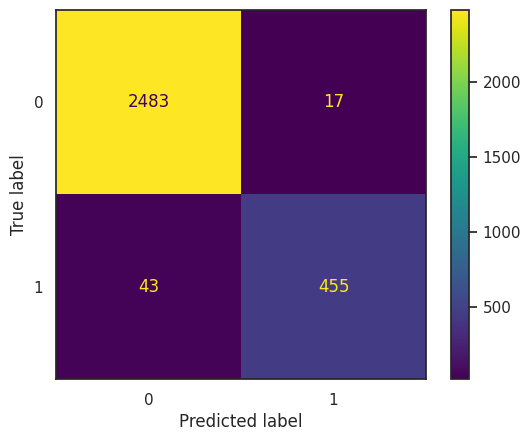

In [89]:
# Generating array of values for confusion matrix
cm = confusion_matrix(y_test, xgboost_pred, labels=xgboost_classifier.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=xgboost_classifier.classes_)
# Plot confusion matrix
disp.plot()
plt.show();

The model predicts more false negatives than false positives, which means that some employees are not identified as at risk of quitting or getting fired, when that's actually the case. But this is still a strong model.

In [90]:
print('Coefficient of determination for trainig set:',
      xgboost_classifier.score(X_train, y_train))

print('Coefficient of determination for testing set:',
      xgboost_classifier.score(X_test, y_test))

Coefficient of determination for trainig set: 0.926992632283992
Coefficient of determination for testing set: 0.9136546184738956


The R^2 for Random Forest, performs something around 7% better than XGBoost.
therefore, Random Forest model explains the target variable better than XGBoost model.

In [91]:
# Predictions on test data
result2 = get_scores('XGBoost Predictions', xgboost_classifier, X_test, y_test)
pd.concat([result1, result2], axis=0)

,model,precision,recall,f1,accuracy,AUC
0,Random Forest Predictions,0.986928,0.909639,0.946708,0.982989,0.953619
0,XGBoost Predictions,0.963983,0.913655,0.938144,0.979987,0.953427


Now we can be more confident and it's safe to say, that `Random Forest` model is the **Champion Model!**

i.e.(The champion challenger job step evaluates a model and compares it to one or more challengers. After the system compares the results, the best model becomes the new champion. The Champion corresponds to the most effective model.
)

#### **Feature importances of champion model**



<Figure size 1000x1500 with 0 Axes>

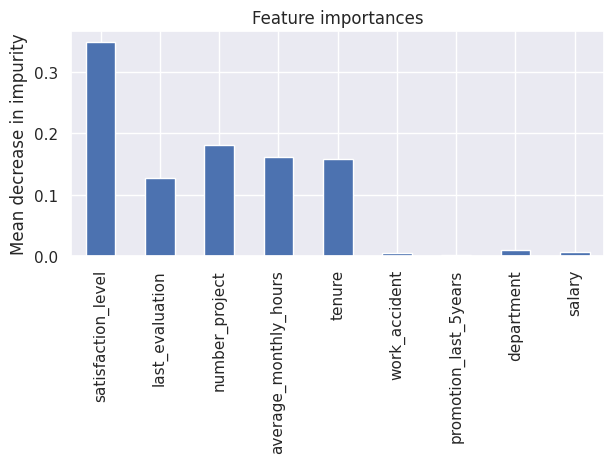

In [92]:
plt.figure(figsize=(10, 15))
sns.set_theme(style='darkgrid')
importances = random_forest_classifier.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()
plt.show();

The most predictive features all were related to employee's satisfaction level and number of projects of each person.

### 1. **Predict on full dataset**

In [93]:
y_preds_full = random_forest_classifier.best_estimator_.predict(X)

In [94]:
# Create a new df containing just the department col from the whole dataset
final_preds = customer[['department', 'salary']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Check that it worked
final_preds.tail(30)

,department,salary,y_preds_full
11970,marketing,high,0
11971,accounting,high,0
11972,accounting,high,0
11973,IT,medium,0
11974,IT,medium,0
11975,management,high,0
11976,marketing,medium,0
11977,marketing,medium,0
11978,marketing,medium,0
11979,sales,medium,0


### Check performance on full dataset

In [95]:
final_preds = final_preds['y_preds_full']
# Evaluation metrics for full dataset
print('Accuracy:', accuracy_score(y, final_preds))
print('Recall:', recall_score(y, final_preds))
print('Precision:', precision_score(y, final_preds))
print('F1 score:', f1_score(y, final_preds))
print('ROC-AUC:', roc_auc_score(y, final_preds))

Accuracy: 0.9854891168376282
Recall: 0.9211451531893521
Precision: 0.990815775256618
F1 score: 0.954711087975013
ROC-AUC: 0.959722576594676


####  Feature Engineering

There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models

In [96]:
# Droping `satisfaction_level` and saving resulting dataframe in variable data
data = data.drop('satisfaction_level', axis=1)
# Creating `overworked` column.
data['overworked'] = (data['average_monthly_hours'] > 175).astype(int)
# drop `average_monthly_hours` column
data = data.drop('average_monthly_hours', axis=1)

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

In [97]:
# Isolating variable which we want to predict
y = data['left']
# Selecting the features we want to use in your model
X = data[['last_evaluation', 'number_project', 'tenure',
       'work_accident', 'promotion_last_5years', 'department',
       'salary', 'overworked']]
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    test_size=0.25,
                                                    stratify=y)

#### Random forest - Round 2

In [98]:
# Instantiating model
rf = RandomForestClassifier(random_state=0)
# hyperparameters to search over
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }
# scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']
# Instantiating GridSearch
random_forest_clf = GridSearchCV(rf,
                                param_grid=cv_params,
                                scoring=scoring,
                                cv=5,
                                refit='recall')

In [99]:
# Fit the model
%%time
random_forest_clf.fit(X_train, y_train)

CPU times: user 3min 31s, sys: 652 ms, total: 3min 32s
Wall time: 3min 35s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [100]:
# make predictions
rf_pred = random_forest_clf.best_estimator_.predict(X_test)

In [101]:
# Best params
random_forest_clf.best_params_

{'max_depth': 7,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [102]:
# Best scores
random_forest_clf.best_score_

0.8881327018473211

This model performs very well, even without satisfaction levels and detailed hours worked data.

In [103]:
# All CV scores
rf_result = make_results('Tuned Random Forest', random_forest_clf, 'recall')
total_cv_table = pd.concat([table_results, xgboost_result, rf_result], axis=0)
total_cv_table

,model,precision,recall,F1,accuracy
0,Random Forest,0.987603,0.908907,0.946589,0.982987
0,XGBoost model,0.963387,0.915602,0.938851,0.980207
0,Tuned Random Forest,0.904100,0.888133,0.895969,0.965751


In [104]:
result3 = get_scores('New Random Forest Predictions', random_forest_clf,
                     X_test, y_test)

In [105]:
pd.concat([result1, result2, result3])

,model,precision,recall,f1,accuracy,AUC
0,Random Forest Predictions,0.986928,0.909639,0.946708,0.982989,0.953619
0,XGBoost Predictions,0.963983,0.913655,0.938144,0.979987,0.953427
0,New Random Forest Predictions,0.892929,0.887550,0.890232,0.963642,0.933175


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

In [106]:
print('Coefficient of determination for trainig set:',
      random_forest_clf.score(X_train, y_train))

print('Coefficient of determination for testing set:',
      random_forest_clf.score(X_test, y_test))

Coefficient of determination for trainig set: 0.8914936369725385
Coefficient of determination for testing set: 0.8875502008032129


Although the champion model is still first random forest, and some scores fell, but the model is still good, and it makes us sure, that this does not lead to overfitting.

In [107]:
target_names = ['left', 'did not leave']
print(classification_report(y_test, rf_pred, target_names=target_names))

               precision    recall  f1-score   support

         left       0.98      0.98      0.98      2500
did not leave       0.89      0.89      0.89       498

     accuracy                           0.96      2998
    macro avg       0.94      0.93      0.93      2998
 weighted avg       0.96      0.96      0.96      2998



#### Tuned Random Forest feature importance

In [108]:
tree2_importances = pd.DataFrame(random_forest_clf.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.378707
last_evaluation,0.255148
tenure,0.245069
overworked,0.099007
work_accident,0.007825
salary,0.006910
department,0.006393
promotion_last_5years,0.000941


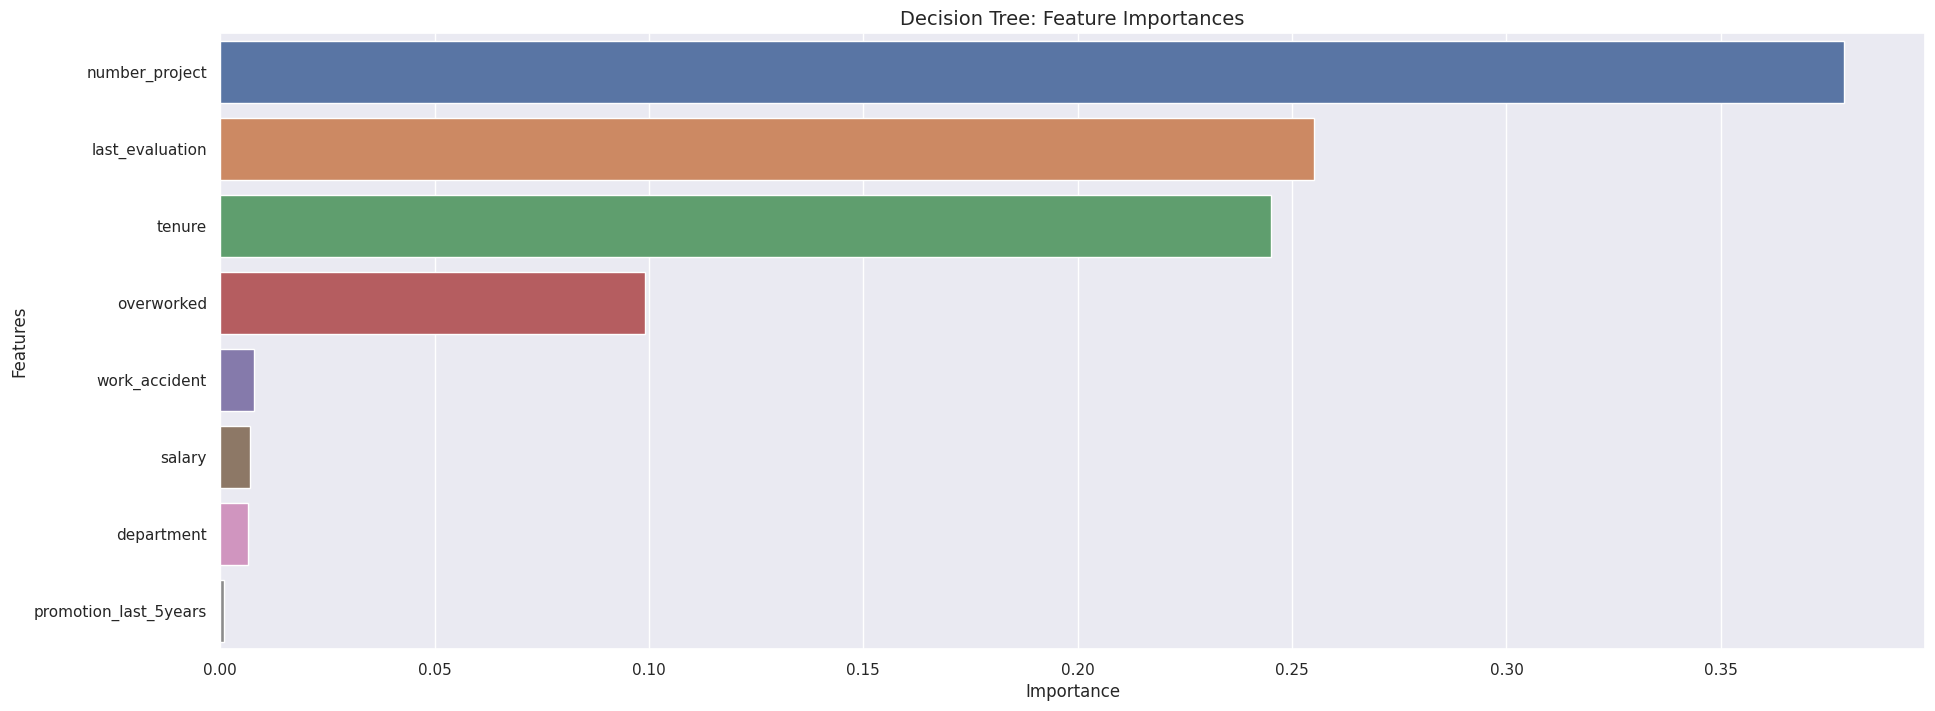

In [109]:
# Barplot to visualize the decision tree feature importances.
sns.set_theme(style='darkgrid')
plt.figure(figsize=(22, 8))
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances", fontsize=14)
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

**importance for xgboost model**

<Figure size 2200x800 with 0 Axes>

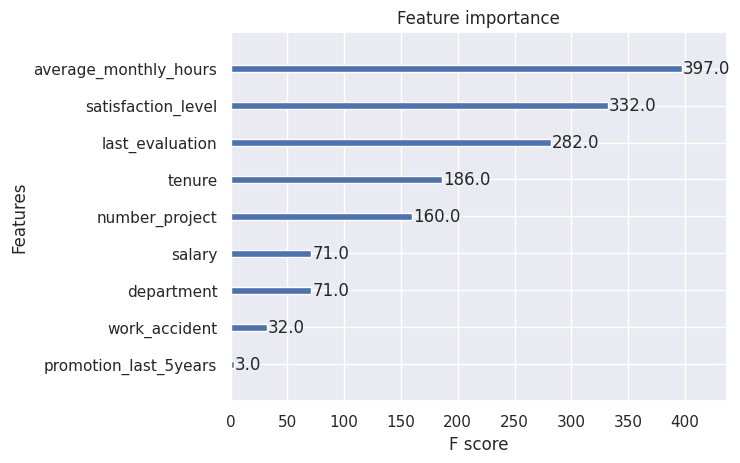

In [110]:
# Barplot to visualize the decision tree feature importances.
plt.figure(figsize=(22, 8))
sns.set_theme(style='darkgrid')
plot_importance(xgboost_classifier.best_estimator_)
plt.show();

last_evaluation, number_project, tenure (time_spend_company), and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model. also salary, seems to a good predictor for xgboost model

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.